### Assignment 2, Part 2

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from warnings import warn

In [2]:
# Import Data
df2 = pd.read_csv("Group_11_Question_2_Data.csv", index_col=0)

A number of supplementary functions are created to perform a number of statistical tests or routine calulations

In [3]:
def check_normality(data, alpha):
    """
    Checks the normality of a given dataset using the Shapiro-Wilk test.

    Parameters:
    -----------
    data : array_like
        The dataset to be tested for normality.
    alpha : float
        The significance level for the hypothesis test. The default value is 0.05.

    Returns:
    --------
    stat : float
        The test statistic from the Shapiro-Wilk test.
    p : float
        The p-value from the Shapiro-Wilk test.

    Warnings:
    ---------
    If the p-value is less than alpha/2, a warning is raised indicating that the null hypothesis 
    cannot be rejected, and the data is not normally distributed.
    """
    stat, p =stats.shapiro(data)

    if p < alpha/2:
        warn("Fail to reject null hypothesis >> Data is not normally distributed")

    return stat, p

def confidence_levels(value, uncertainty):
    """
    Calculates the confidence interval for a given value with a specified uncertainty.

    Parameters:
    -----------
    value : float
        The value for which the confidence interval is to be calculated.
    uncertainty : float
        The uncertainty associated with the value.

    Returns:
    --------
    A tuple containing the lower and upper bounds of the confidence interval.

    Examples:
    ---------
    Calculate the 95% confidence interval for a value of 10 with an uncertainty of 2:

    >>> confidence_levels(10, 2)
    (8, 12)
    """
    return value - uncertainty, value + uncertainty

def beta_ttest(b1, se_b1, alpha, df, i=1):
    """
    Conducts a t-test for the null hypothesis that the actual value of beta_i is zero.

    Parameters:
    -----------
    b1 : float
        The estimated value of beta_i.
    se_b1 : float
        The standard error of the estimate for beta_i.
    alpha : float
        The significance level for the hypothesis test.
    df : int
        The degrees of freedom for the t-distribution.
    i : int, optional
        The index of the beta coefficient being tested. The default value is 1.

    Returns:
    --------
    t : float
        The test statistic from the t-test.
    p : float
        The p-value from the t-test.

    Warnings:
    ---------
    If the p-value is greater than alpha/2, a warning is raised indicating that the null hypothesis 
    cannot be rejected, and the actual value of beta_i may be zero.

    Examples:
    ---------
    Test the null hypothesis that beta_1 is zero, given that b1=2.5, se_b1=0.8, alpha=0.05, and df=25:

    >>> beta_ttest(2.5, 0.8, 0.05, 25, i=1)
    (3.125, 0.0032083957472670324)
    """
    t = b1/se_b1
    p = stats.t.pdf(t, df)

    if p > alpha/2:
        warn("Fail to reject null hypothesis >> The actual value of beta_{} may be zero, p={}".format(i,p))

    return t, p

def lin_regress_ftest(MSR, MSE, alpha, df):
    """
    Conducts an F-test for the null hypothesis that all beta coefficients in a linear regression model are zero.

    Parameters:
    -----------
    MSR : float
        The mean squared regression value from the ANOVA table.
    MSE : float
        The mean squared error value from the ANOVA table.
    alpha : float
        The significance level for the hypothesis test.
    df : int
        The degrees of freedom for the F-distribution.

    Returns:
    --------
    F : float
        The test statistic from the F-test.
    p : float
        The p-value from the F-test.

    Warnings:
    ---------
    If the p-value is greater than alpha/2, a warning is raised indicating that the null hypothesis 
    cannot be rejected.

    Examples:
    ---------
    Test the null hypothesis that all beta coefficients are zero, given that MSR=350.6, MSE=53.8, alpha=0.05, and df=25:

    >>> lin_regress_ftest(350.6, 53.8, 0.05, 25)
    (25.04498185840708, 1.5770143576808796e-05)
    """
    F = MSR/MSE
    p = stats.f.pdf(F, 1, df)

    if p > alpha/2:
        warn("Fail to reject null hypothesis")

    return F, p

def durbin_watson_autocorrelation(residuals, n):
    """
    Computes the Durbin-Watson statistic to test for autocorrelation in the residuals of a regression model.

    Parameters:
    -----------
    residuals : array-like
        The residual errors from a regression model.
    n : int
        The sample size used to compute the Durbin-Watson statistic.

    Returns:
    --------
    dw : float
        The Durbin-Watson statistic.
    """


    diff_resids = np.diff(residuals, 1)
    dw = np.sum(diff_resids**2) / np.sum(residuals**2)

    # 5% significance upper and lower critical values
    # from https://www3.nd.edu/~wevans1/econ30331/Durbin_Watson_tables.pdf Table A-2
    if n ==20:
        d_L = 1.201
        d_U = 1.411

    if dw < d_L:
        warn("There is statistical evidence that the error terms are positively autocorrelated")
    elif d_L < dw < d_U:
        warn("The test for positive autocorrelation is inconclusive")

    if (4-dw) < d_L:
        warn("There is statistical evidence that the error terms are negatively autocorrelated")
    elif d_L < (4-dw) < d_U:
        warn("The test for negative autocorrelation is inconclusive")

    return dw

C:\Users\enlb2\AppData\Local\Temp\ipykernel_26680\1345355306.py:95: UserWarning: Fail to reject null hypothesis >> The actual value of beta_0 may be zero, p=0.28586079749153287
  warn("Fail to reject null hypothesis >> The actual value of beta_{} may be zero, p={}".format(i,p))


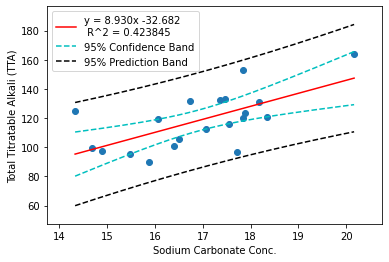

({'r': 0.6510339457689436,
  'R^2': 0.4238451985434798,
  'Standard Error': 15.22426731744742,
  'n': 20,
  'F Stat': 13.241603739994826,
  'p-level': 0.0005741604291949554},
 {'beta0': -32.68171769130532,
  'se': 41.65639076401163,
  'LCL': -120.19854716430733,
  'UCL': 54.83511178169668,
  't Stat': -0.7845547127798735,
  'p-level': 0.28586079749153287},
 {'beta1': 8.930397890246162,
  'se': 2.45414667603608,
  'LCL': 3.77442704857787,
  'UCL': 14.086368731914455,
  't Stat': 3.6389014468648124,
  'p-level': 0.0020893132165300332})

In [4]:
def linear_regression(x: np.ndarray,y: np.ndarray, alpha=0.05):
    """Performs a simple linear regression between two variables x and y.

    Parameters:
    x (np.ndarray): An array of independent variables
    y (np.ndarray): An array of dependent variables
    alpha (float): The level of significance for the hypothesis tests. Default is 0.05.

    Returns:
    regression_statistics (dict): A dictionary of regression statistics, including R^2, standard error,
    sample size, F-statistic, and p-value.
    intercept (dict): A dictionary of information about the intercept, including the value, standard error, 
    95% confidence interval, t-statistic, and p-value.
    slope (dict): A dictionary of information about the slope, including the value, standard error,
    95% confidence interval, t-statistic, and p-value.

    """

    # calculate the number of data points anf the means
    n = len(x)
    x_avg = x.mean()
    y_avg = y.mean()

    
    # calculate the sum of products and sums of squares
    S_xy = ((x-x_avg)*(y-y_avg)).sum()
    S_xx = ((x-x_avg)**2).sum()
    S_yy = ((y-y_avg)**2).sum()

    # calculate beta_1, beta_0, the correlation coefficient and the prediced values
    beta_1 = S_xy/S_xx
    beta_0 = y_avg - beta_1*x_avg
    r = S_xy / np.sqrt(S_xx*S_yy)    
    y_hat = beta_0 + beta_1*x

    # Generate a range of x values to plot the regression line and calulate the predicted values
    x_range = np.linspace(x.min(), x.max(), 1000)
    y_hat_range = beta_0 + beta_1*x_range
    
    # calculate the residuals and check its normality and autocorreleation
    e = y - y_hat
    check_normality(e, alpha)
    durbin_watson_autocorrelation(e, n)

    df = n-2
    # calculate the mean squared error and the mean squared regression
    mse = (e**2).sum() / df
    msr = ((y_hat - y_avg)**2).sum()

    
    # perform an F-test to determine if the regression is significant
    F, p_regress = lin_regress_ftest(msr, mse, alpha, df)

    # calculate the standard errors
    s_beta_0 =np.sqrt(mse * (1/n + x_avg**2/S_xx))
    s_beta_1 = np.sqrt(mse/S_xx)
    s_y_hat_range =  np.sqrt(mse *(1/n + (x_range-x_avg)**2/S_xx))
    s_pred_range = np.sqrt(s_y_hat_range**2+mse)

    # perform a t-test to determine if beta_1 and beta_0 are significant
    tstat_beta_1, p_beta_1 = beta_ttest(beta_1, s_beta_1, alpha, df)
    tstat_beta_0, p_beta_0 =beta_ttest(beta_0, s_beta_0, alpha, df, i=0)
    

    # calculate the uncertainty with the appropriate t-value
    t = stats.t.ppf(1-alpha/2, df)
    unc_beta_0 = t * s_beta_0
    unc_beta_1 = t * s_beta_1
    unc_y_hat_range = t * s_y_hat_range
    unc_pred_range = t * s_pred_range

    
    # calculate the confidence intervals
    cl_beta_0 = confidence_levels(beta_0, unc_beta_0)
    cl_beta_1 = confidence_levels(beta_1, unc_beta_1)
    cl_y_hat_range = confidence_levels(y_hat_range, unc_y_hat_range)
    cl_pred_range = confidence_levels(y_hat_range, unc_pred_range)

    plt.scatter(x,y)
    
    plt.plot(x_range, y_hat_range, 'r', label='y = {:.3f}x {:.3f} \n R^2 = {:.6f}'.format(beta_1, beta_0 ,r**2))
    plt.plot(x_range, cl_y_hat_range[0], 'c--',label='95% Confidence Band')
    plt.plot(x_range, cl_y_hat_range[1], 'c--')
    plt.plot(x_range, cl_pred_range[0], 'k--',label='95% Prediction Band')
    plt.plot(x_range, cl_pred_range[1], 'k--')

    plt.margins(0.1,0.1)
    plt.legend()

    regression_statistics = {"r": r, "R^2": r**2, "Standard Error": np.sqrt(mse), "n": n, "F Stat": F, "p-level": p_regress}
    intercept = {"beta0": beta_0, "se": s_beta_0, "LCL": cl_beta_0[0], "UCL": cl_beta_0[1], "t Stat": tstat_beta_0, "p-level": p_beta_0}
    slope = {"beta1": beta_1, "se": s_beta_1, "LCL": cl_beta_1[0], "UCL": cl_beta_1[1], "t Stat": tstat_beta_1, "p-level": p_beta_1}

    return regression_statistics, intercept, slope

result = linear_regression(df2["White Liquor Carbonate"], df2["White Liquor TTA"])
plt.xlabel("Sodium Carbonate Conc.")
plt.ylabel("Total Titratable Alkali (TTA)")
plt.show()

result